In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
unique, counts = np.unique(y_val, return_counts=True)

dict(zip(unique, counts))

{0: 1158,
 1: 1373,
 2: 1194,
 3: 1237,
 4: 1157,
 5: 1110,
 6: 1187,
 7: 1265,
 8: 1172,
 9: 1147}

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)

dict(zip(unique, counts))

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

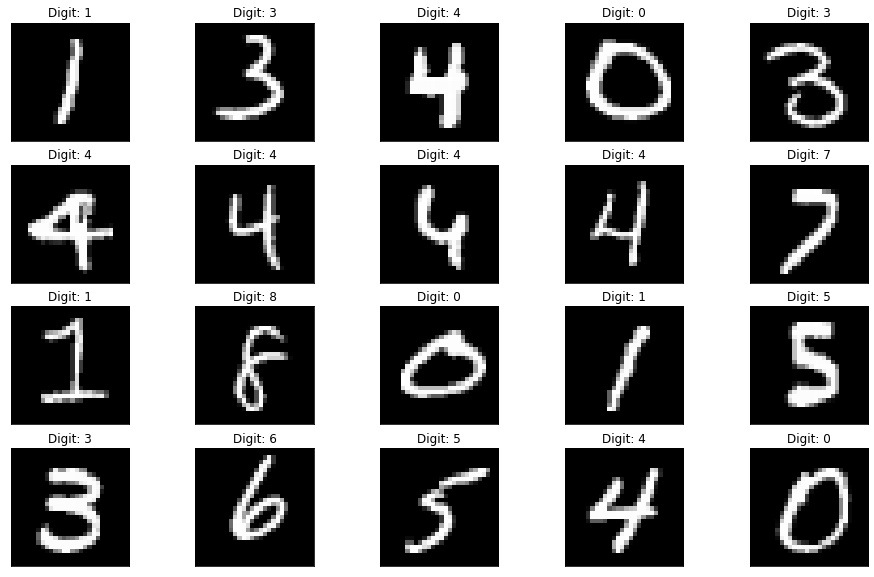

In [ ]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)

plt.show()

In [ ]:
X_train[i].shape

(28, 28, 1)

In [ ]:
print(X_train.shape)

(48000, 28, 28)


In [ ]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [ ]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_val = (X_val - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)

X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [ ]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_val = X_val.reshape((X_val.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [ ]:
mnist_model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [ ]:
mnist_optimizer = SGD(learning_rate=0.01, momentum=0.9)
mnist_model.compile(
    optimizer=mnist_optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [ ]:
mnist_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
mnist_model.fit(X_train, y_train, epochs=10, callbacks =[mnist_callback], validation_data=(X_val,y_val), batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 13s 3ms/step - loss: 0.2612 - accuracy: 0.9204 - val_loss: 0.1230 - val_accuracy: 0.9626
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0890 - accuracy: 0.9727 - val_loss: 0.0765 - val_accuracy: 0.9772
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0744 - val_accuracy: 0.9772
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0398 - accuracy: 0.9879 - val_loss: 0.0613 - val_accuracy: 0.9816
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0553 - val_accuracy: 0.9831
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0205 - accuracy: 0.9940 - val_loss: 0.0580 - val_accuracy: 0.9839
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0569 - val_accuracy

In [ ]:
y_hat = mnist_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = np.argmax(y_hat, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



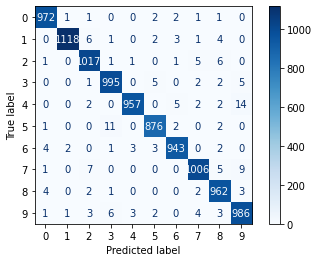

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
miss_pred = {}
for label in range(10):
  miss_pred[label] = [(i,y_pred[i]) for i in range(len(y_test)) if y_test[i] == label and y_pred[i] != label]


In [ ]:
X_test[miss_pred[int(1)][0][0]].shape

(28, 28, 1)

<ipython-input-33-cb4ddd66d01c>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 5, i + 1)


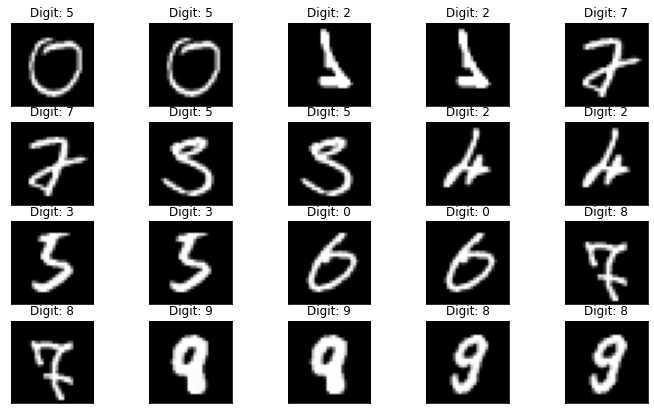

In [ ]:
plt.figure(figsize=(12, 7))
for i in range(20):
    image = X_test[miss_pred[int(i/2)][0][0]]
    digit = miss_pred[int(i/2)][0][1]
    plot_digit(image, digit, plt, i)

    image = X_test[miss_pred[int(i/2)][1][0]]
    digit = miss_pred[int(i/2)][1][1]
    plot_digit(image, digit, plt, i)

plt.show()